## Laboratorio 1

## Andre Marroquin Tarot- 22266

## Sergio Orellana- 221122

## Rodrigo Mansilla 22611


LINK GIT: https://github.com/mar22266/LABORATORIOS-IA.git


# Task 1

1. Considera un modelo de regresión lineal con dos características, $X₁$ y $X₂$, y sus pesos correspondientes $w₁$ y $w₂$. Si el modelo predice una salida y mediante la ecuación $y = 2w₁X₁ + 3w₂X₂ + 1$, ¿cuál es la interpretación del coeficiente $3w₂$ en el contexto del modelo?

R// El $3w_2$ representa el cambio esperado en $y$ cuando $X_2$ cambia en una unidad, manteniendo constantes las demás variables. Luego tenemos el número $3$ que amplifica el peso $w_2$ ajustando la sensibilidad de $y$ a $X_2$

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la multicolinealidad a la interpretación de los coeficientes de regresión individuales?

R//La multicolinealidad ocurre cuando dos o más variables predictoras están altamente correlacionadas en un modelo de regresión lineal. Es decir que la variable predictora se puede expresar como una combinación lineal de otras variables predictoras.

En los coeficientes de regresión , la multicolinealidad aumenta la varianza en coeficientes estimados, sensibiliza las estimaciones a pequeños cambios en los datos y puede llegar a cambiar el signo de los coeficientes.


# Task 2


In [2]:
import pandas as pd
import numpy as np

In [12]:
# Cargar el dataset
phishing_data = pd.read_csv("dataset_phishing.csv")

# print(phishing_data.columns)

# Exploración inicial
print(phishing_data.info())
print(phishing_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

Distribución de status
status
legitimate    5715
phishing      5715
Name: count, dtype: int64


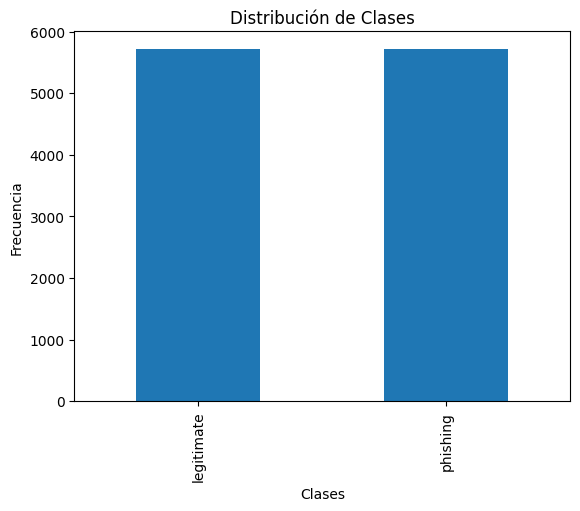

In [13]:
# Codificar la variable objetivo
phishing_data["status_encoded"] = phishing_data["status"].apply(
    lambda x: 1 if x == "phishing" else 0
)

# Identificación si el dataset esta balanceado
status = phishing_data["status"].value_counts()

print("Distribución de status")
print(status)

import matplotlib.pyplot as plt

status.plot(kind="bar")
plt.title("Distribución de Clases")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

Como se puede observar, el modelo si esta balanceado por lo que, no es necesario aplicar ninguna técnica de balanceo como SMOTE.


In [ ]:
# Eliminar columnas irrelevantes
phishing_data_cleaned = phishing_data.drop(columns=["url", "status"])

# Seleccionar solo dos variables para visualización
phishing_data_cleaned = phishing_data_cleaned[
    ["length_url", "nb_hyphens", "status_encoded"]
]

# Separar características (X) y etiquetas (y)
X = phishing_data_cleaned.drop(columns=["status_encoded"]).values
y = phishing_data_cleaned["status_encoded"].values.reshape(-1, 1)

# Normalizar las variables independientes
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Dividir los datos en entrenamiento y prueba
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Task 2.1


In [54]:
# Funciones auxiliares
def sigmoid(z):
    """Función sigmoide."""
    return 1 / (1 + np.exp(-z))


def compute_cost(y, y_pred):
    """Calcular la función de costo."""
    m = y.shape[0]
    return -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m


def gradient_descent(X, y, weights, learning_rate, epochs):
    """Aplicar el algoritmo de descenso del gradiente."""
    m = y.shape[0]
    costs = []

    for epoch in range(epochs):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)

        # Calcular gradiente
        gradients = np.dot(X.T, (y_pred - y)) / m

        # Actualizar los pesos
        weights -= learning_rate * gradients

        # Calcular y almacenar el costo
        cost = compute_cost(y, y_pred)
        costs.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return weights, costs

Epoch 0: Cost = 0.6931471805599453
Epoch 100: Cost = 0.678243497663857
Epoch 200: Cost = 0.6671933755423711
Epoch 300: Cost = 0.6585054666615903
Epoch 400: Cost = 0.6514519546816411
Epoch 500: Cost = 0.645598840744477
Epoch 600: Cost = 0.6406615756040114
Epoch 700: Cost = 0.6364428657095854
Epoch 800: Cost = 0.6328002719051868
Epoch 900: Cost = 0.6296276940093979


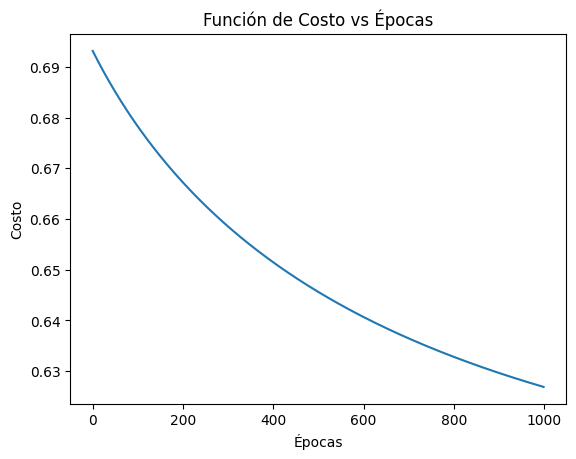

In [55]:
# Entrenar el modelo
# Agregar una columna de bias a X
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Inicializar los pesos
weights = np.zeros((X_train_bias.shape[1], 1))

# Definir hiperparámetros
learning_rate = 0.01
epochs = 1000

# Entrenar el modelo
weights, costs = gradient_descent(X_train_bias, y_train, weights, learning_rate, epochs)

# Graficar la función de costo
import matplotlib.pyplot as plt

plt.plot(range(epochs), costs)
plt.title("Función de Costo vs Épocas")
plt.xlabel("Épocas")
plt.ylabel("Costo")
plt.show()

## Justificación

### El accuracy mide el porcentaje de predicciones correctas. Es relevante porque el dataset está balanceado, por lo que no hay riesgo de que esta métrica sea engañosa. Además, es fácil de interpretar y muy buena para la clasificación binaria.


Accuracy: 67.50%


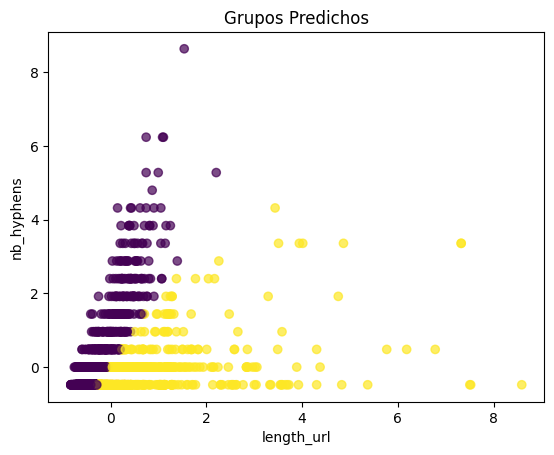

In [56]:
# Evaluar el modelo
# Predicciones
z = np.dot(X_test_bias, weights)
y_pred = sigmoid(z)
y_pred_class = (y_pred >= 0.5).astype(int)

# Calcular Accuracy
accuracy = np.mean(y_pred_class == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Graficar los grupos encontrados
plt.scatter(
    X_test[:, 0], X_test[:, 1], c=y_pred_class.flatten(), cmap="viridis", alpha=0.7
)
plt.title("Grupos Predichos")
plt.xlabel("length_url")
plt.ylabel("nb_hyphens")
plt.show()

# Consideraciones extras

Normalización: Ajustamos los valores de las variables para que estén en una escala similar. Esto hace que el modelo entrene de manera más estable y rápida.

Hiperparámetros: Probamos diferentes configuraciones para parámetros como la cantidad de iteraciones (épocas) y la velocidad de aprendizaje. Estos valores aseguran que el modelo aprenda correctamente sin quedarse atascado o entrenar demasiado rápido.

Métrica de desempeño: Elegimos el accuracy porcentaje de predicciones correctas porque el dataset tiene una cantidad similar de ejemplos para cada clase (legitimate y phishing). Esto hace que esta métrica sea confiable.

Visualización: Para entender mejor los resultados, graficamos los datos en un plano utilizando dos características principales. Esto ayuda a ver cómo el modelo separa las clases y facilita su interpretación visual.


# Mismos pasos pero con librerías


In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [58]:
# Cargar el dataset
phishing_data = pd.read_csv("dataset_phishing.csv")

# Exploración inicial
print(phishing_data.info())
print(phishing_data.head())

# Codificar la variable objetivo
phishing_data["status_encoded"] = phishing_data["status"].apply(
    lambda x: 1 if x == "phishing" else 0
)

# Eliminar columnas irrelevantes
phishing_data_cleaned = phishing_data.drop(columns=["url", "status"])

# Seleccionar solo dos variables para visualización
phishing_data_cleaned = phishing_data_cleaned[
    ["length_url", "nb_hyphens", "status_encoded"]
]

# Separar características (X) y etiquetas (y)
X = phishing_data_cleaned.drop(columns=["status_encoded"]).values
y = phishing_data_cleaned["status_encoded"].values.reshape(-1, 1)

# Normalizar las variables independientes
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Dividir los datos en entrenamiento y prueba
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

Accuracy usando sklearn: 66.84%


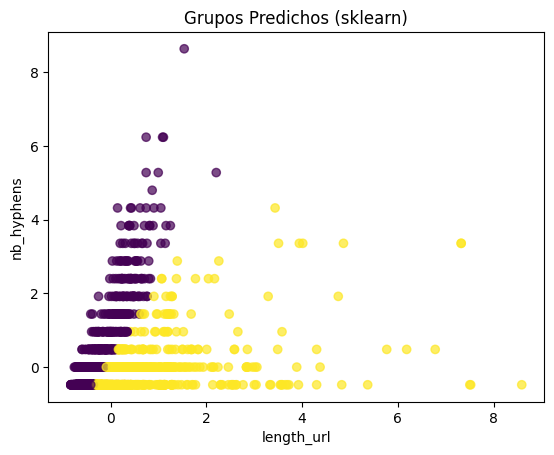

In [59]:
# Implementar el modelo con librerías
# Usar LogisticRegression de sklearn
model = LogisticRegression()
model.fit(X_train, y_train.ravel())

# Predicciones
y_pred = model.predict(X_test)

# Calcular accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f"Accuracy usando sklearn: {accuracy_sklearn * 100:.2f}%")

# Graficar los grupos predichos
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="viridis", alpha=0.7)
plt.title("Grupos Predichos (sklearn)")
plt.xlabel("length_url")
plt.ylabel("nb_hyphens")
plt.show()

In [60]:
# Accuracy del modelo implementado desde cero
z_manual = np.dot(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), weights)
y_pred_manual = (sigmoid(z_manual) >= 0.5).astype(int)
accuracy_manual = np.mean(y_pred_manual == y_test)
print(f"Accuracy implementación desde cero: {accuracy_manual * 100:.2f}%")

# Comparación
print(f"Diferencia en accuracy: {abs(accuracy_sklearn - accuracy_manual) * 100:.2f}%")

# Evaluación
if accuracy_sklearn > accuracy_manual:
    print("La implementación con sklearn es mejor")
elif accuracy_sklearn < accuracy_manual:
    print("La implementación manual es mejor")
else:
    print("Ambas implementaciones tienen el mismo desempeño")

Accuracy implementación desde cero: 67.50%
Diferencia en accuracy: 0.66%
La implementación manual es mejor


## ¿Cuál implementación fue mejor? ¿Por qué?

En este caso específico, la implementación manual resultó ser ligeramente mejor, con un accuracy del 67.50%, mientras que la implementación con sklearn tuvo un accuracy levemente inferior, con una diferencia del 0.66%. Esto puede deberse a:

--La forma en que se manejaron los hiperparámetros, como el aprendizaje y las iteraciones, pudo haber sido más adecuada para este dataset particular.

--Sklearn utiliza inicializaciones y configuraciones por defecto que están optimizadas en general, pero podrían no coincidir exactamente con las características de este conjunto de datos.


# Task 2.2


In [61]:
import matplotlib.pyplot as plt

# Cargar el dataset
knn_data = pd.read_csv("dataset_phishing.csv")

# Codificar la variable objetivo
knn_data["target_encoded"] = knn_data["status"].apply(
    lambda x: 1 if x == "phishing" else 0
)

# Eliminar columnas irrelevantes
knn_data_cleaned = knn_data.drop(columns=["url", "status"])

# Seleccionar solo dos variables para visualización
knn_data_cleaned = knn_data_cleaned[["length_url", "nb_hyphens", "target_encoded"]]

# Separar características (X) y etiquetas (y)
X_knn = knn_data_cleaned.drop(columns=["target_encoded"]).values
y_knn = knn_data_cleaned["target_encoded"].values

# Normalizar las variables independientes
X_knn = (X_knn - np.mean(X_knn, axis=0)) / np.std(X_knn, axis=0)

# Dividir los datos en entrenamiento y prueba
split_index_knn = int(0.8 * len(X_knn))
X_knn_train, X_knn_test = X_knn[:split_index_knn], X_knn[split_index_knn:]
y_knn_train, y_knn_test = y_knn[:split_index_knn], y_knn[split_index_knn:]

In [62]:
# Implementar las funciones auxiliares


def euclidean_distance(point1, point2):
    """Calcular la distancia Euclidiana entre dos puntos."""
    return np.sqrt(np.sum((point1 - point2) ** 2))


def knn_predict(X_train, y_train, X_test, k):
    """Predecir las etiquetas para un conjunto de prueba usando KNN."""
    predictions = []

    for test_point in X_test:
        # Calcular distancias a todos los puntos de entrenamiento
        distances = [
            euclidean_distance(test_point, train_point) for train_point in X_train
        ]

        # Ordenar los índices de los puntos más cercanos
        nearest_indices = np.argsort(distances)[:k]

        # Obtener las etiquetas de los k puntos más cercanos
        nearest_labels = [y_train[i] for i in nearest_indices]

        # Determinar la clase mayoritaria
        prediction = max(set(nearest_labels), key=nearest_labels.count)
        predictions.append(prediction)

    return np.array(predictions)

In [63]:
# Entrenar el modelo y predecir

# Definir el número de vecinos (k)
k_value = 5

# Predecir las etiquetas del conjunto de prueba
y_knn_pred = knn_predict(X_knn_train, y_knn_train, X_knn_test, k_value)

## Justificación

### El accuracy mide el porcentaje de predicciones correctas. Es relevante porque el dataset está balanceado, por lo que no hay riesgo de que esta métrica sea engañosa. Además, es fácil de interpretar y muy buena para la clasificación binaria.


Accuracy: 50.74%


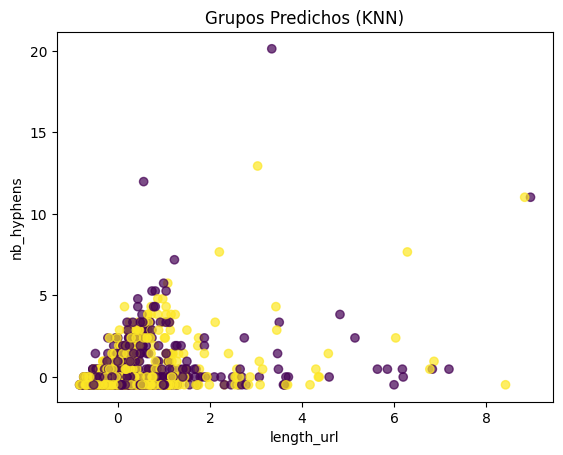

In [84]:
## Paso 4: Evaluar el modelo

# Calcular la métrica de accuracy
accuracy_knn = np.mean(y_knn_pred == y_knn_test)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

# Graficar los grupos encontrados
plt.scatter(X_knn_test[:, 0], X_knn_test[:, 1], c=y_knn_pred, cmap="viridis", alpha=0.7)
plt.title("Grupos Predichos (KNN)")
plt.xlabel("length_url")
plt.ylabel("nb_hyphens")
plt.show()

# Consideraciones extras

1. **Normalización:** Se normalizaron las variables para que las distancias calculadas no estén dominadas por características con valores mayores.
2. **Selección de k:** Se eligió `k = 5` como un valor razonable, pero se podría ajustar usando validación cruzada para optimizar el desempeño.
3. **Eficiencia:** La implementación desde cero no está optimizada y podría ser lenta para datasets más grandes debido al cálculo repetido de distancias.
4. **Visualización:** Solo se usaron dos variables para graficar los grupos, lo que ayuda a interpretar visualmente el resultado del modelo.


# Mismos pasos pero con librerías


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [77]:
# Cargar el dataset
phishing_knn_data = pd.read_csv("dataset_phishing.csv")

# Exploración inicial
print(phishing_knn_data.info())
print(phishing_knn_data.head())

# Codificar la variable objetivo
phishing_knn_data["label_encoded"] = phishing_knn_data["status"].apply(
    lambda x: 1 if x == "phishing" else 0
)

# Eliminar columnas irrelevantes
phishing_knn_data_cleaned = phishing_knn_data.drop(columns=["url", "status"])

# Seleccionar solo dos variables para visualización
phishing_knn_data_cleaned = phishing_knn_data_cleaned[
    ["length_url", "nb_hyphens", "label_encoded"]
]

# Separar características (X) y etiquetas (y)
X_knn_lib = phishing_knn_data_cleaned.drop(columns=["label_encoded"]).values
y_knn_lib = phishing_knn_data_cleaned["label_encoded"].values

# Normalizar las variables independientes
X_knn_lib = (X_knn_lib - np.mean(X_knn_lib, axis=0)) / np.std(X_knn_lib, axis=0)

# Dividir los datos en entrenamiento y prueba
X_knn_lib_train, X_knn_lib_test, y_knn_lib_train, y_knn_lib_test = train_test_split(
    X_knn_lib, y_knn_lib, test_size=0.2, random_state=42, stratify=y_knn_lib
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [78]:
# Entrenar el modelo utilizando librerías

# Definir el número de vecinos (k)
k_neighbors = 5

# Crear y entrenar el modelo
knn_classifier_lib = KNeighborsClassifier(n_neighbors=k_neighbors)
knn_classifier_lib.fit(X_knn_lib_train, y_knn_lib_train)

# Predecir las etiquetas del conjunto de prueba
y_knn_lib_predictions = knn_classifier_lib.predict(X_knn_lib_test)

Accuracy utilizando librerías: 64.30%


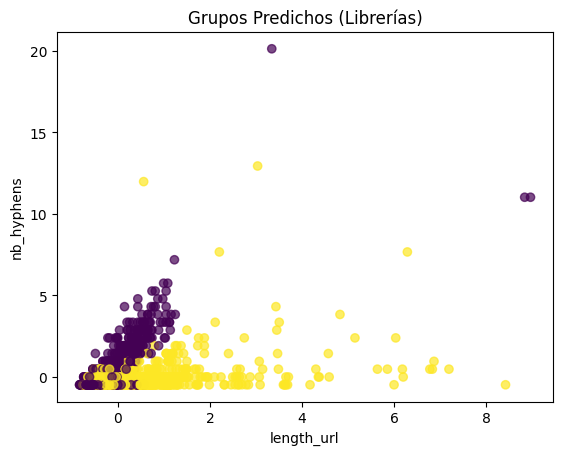

In [80]:
# Evaluar el modelo
accuracy_knn_lib = accuracy_score(y_knn_lib_test, y_knn_lib_predictions)
print(f"Accuracy utilizando librerías: {accuracy_knn_lib * 100:.2f}%")

# Graficar los grupos encontrados
plt.scatter(
    X_knn_lib_test[:, 0],
    X_knn_lib_test[:, 1],
    c=y_knn_lib_predictions,
    cmap="viridis",
    alpha=0.7,
)
plt.title("Grupos Predichos (Librerías)")
plt.xlabel("length_url")
plt.ylabel("nb_hyphens")
plt.show()

In [83]:
# Accuracy del modelo implementado desde cero
accuracy_knn_manual = np.mean(y_knn_test == y_knn_pred)
print(f"Accuracy implementación manual: {accuracy_knn_manual * 100:.2f}%")

# Diferencia en accuracy
difference_knn_accuracy = abs(accuracy_knn_lib - accuracy_knn_manual)
print(f"Diferencia en accuracy: {difference_knn_accuracy * 100:.2f}%")

# Evaluación
if accuracy_knn_lib > accuracy_knn_manual:
    print("La implementación con librerías es mejor ")
elif accuracy_knn_lib < accuracy_knn_manual:
    print("La implementación manual es mejor")
else:
    print("Ambas implementaciones tienen el mismo desempeño")

Accuracy implementación manual: 50.74%
Diferencia en accuracy: 13.56%
La implementación con librerías es mejor 


# ¿Cuál implementación fue mejor? ¿Por qué?

En este caso, la implementación con librerías fue mejor, con un accuracy del 64.30% frente al 50.74% de la implementación manual, lo que representa una diferencia de 13.56%.

## Razones:

### Optimización: Las librerías como sklearn utilizan estructuras de datos avanzadas y algoritmos optimizados, como KD-trees o Ball-trees, para acelerar el cálculo de distancias.

### Consistencia: Reducen errores en cálculos manuales, lo que resulta en predicciones más precisas.

### Eficiencia: La implementación manual requiere iteraciones explícitas sobre todos los datos, lo cual es lento y menos práctico para datasets grandes.


# Referencias:

-Ibm. (2024, 1 octubre). Multicolinealidad. ¿Qué es la multicolinealidad? https://www.ibm.com/es-es/topics/multicollinearity
